importing IPython notebook from DX_screen

importing IPython notebook from Imports

importing IPython notebook from Setup/DX_Imports

importing IPython notebook from Setup/Imports

Populating the interactive namespace from numpy and matplotlib


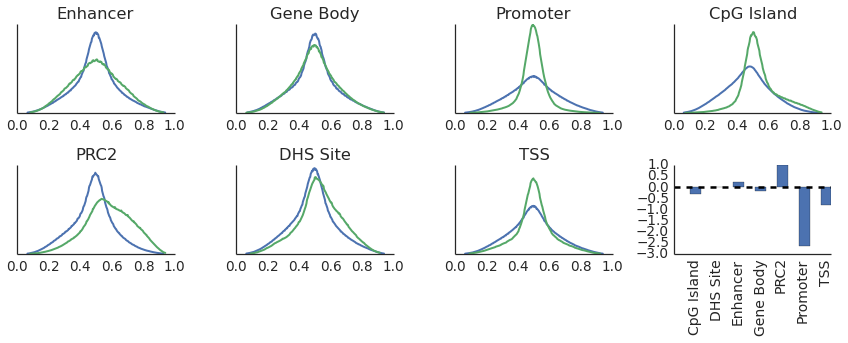

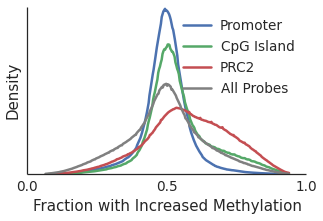

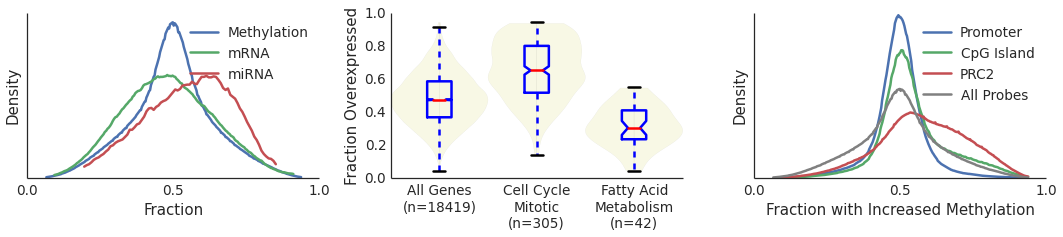

In [1]:
import NotebookImport
from DX_screen import *

In [2]:
rna_binary = matched_rna.xs('01',1,1) > matched_rna.xs('11',1,1)

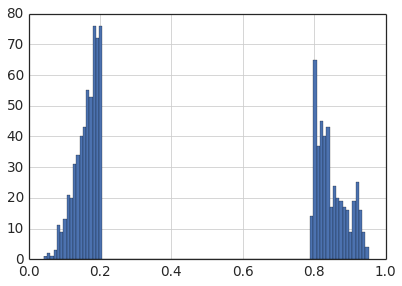

In [3]:
bp = dx_rna.p.order().index[:1000]
dx_rna.frac.ix[bp].hist(bins=100)

In [4]:
tt = dx_rna.frac.ix[bp] > .5

In [5]:
agreement = (rna_binary.ix[tt.index].T == tt).mean(1)

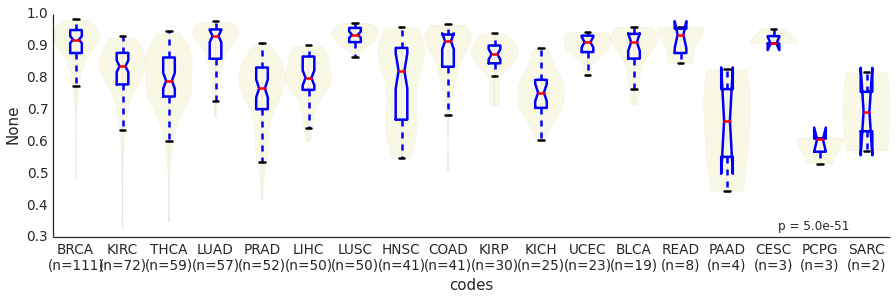

In [6]:
fig, ax = subplots(figsize=(15,4))
violin_plot_pandas(codes, agreement, ax=ax)
sns.despine(fig)

In [8]:
cancers = codes.ix[matched_tn.columns.get_level_values(0)].unique()
pts = matched_tn.columns.get_level_values(0)
cancers_to_use = ti(codes.ix[pts].value_counts() > 15)
df_inf = {c: infer_normal_knn(rna_df.ix[:, ti(codes == c)], r_curtoff=.3, k=5)
          for c in cancers_to_use}
tn_inf_c = pd.concat(df_inf.values(), axis=1)

In [9]:
rna_binary_inf = tn_inf_c.xs('01',1,1) > tn_inf_c.xs('11',1,1)

In [10]:
mut = pd.read_csv('/cellar/users/agross/TCGA_Code/TCGA/Data/MAFs_new_2/meta.csv',
                 low_memory=True)
mut = mut.set_index(['Tumor_Sample_Barcode','Hugo_Symbol'])['0']
mut = mut.unstack().fillna(0)
mut = FH.fix_barcode_columns(mut.T, tissue_code='01')
mut = mut[mut.sum(1) > 3]
mut = mut.ix[:, (mut > 0).sum() < 1000]

In [11]:
maf = pd.read_csv('/cellar/users/agross/TCGA_Code/TCGA/Data/MAFs_new_2/mega_maf.csv',
                 low_memory=True)

/cellar/users/agross/anaconda2/lib/python2.7/site-packages/pandas/io/parsers.py:1130: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


In [12]:
maf['barcode'] = maf.Tumor_Sample_Barcode.map(lambda s: s[:12])
maf = maf.ix[maf.Tumor_Sample_Barcode.map(lambda s: s[13:15]).order().index]
maf = maf.drop_duplicates(subset=['Hugo_Symbol','barcode','Start_position'])

In [13]:
gg = ti(mut.ix[:, rna_binary_inf.columns].sum(1) > 200).intersection(rna_binary.index)
len(gg)

1517

In [14]:
m = pd.DataFrame({g: fisher_exact_test(mut.ix[g]>0, rna_binary.ix[g]) 
                  for g in gg}).T

In [15]:
m_inf = pd.DataFrame({g: fisher_exact_test(mut.ix[g]>0, rna_binary_inf.ix[g]) 
                  for g in gg}).T

In [16]:
m_inf.sort('p').head(20)

,odds_ratio,p
TP53,0.33,1.46e-53
VHL,0.15,4.34e-31
RB1,0.23,2.11e-16
PCDHAC2,0.41,5.27e-16
APC,0.34,1.03e-10
TNR,0.29,1.59e-10
NEB,2.08,2.46e-10
LRRK2,0.27,5.58e-10
LRP1B,1.93,9.93e-10
HECW1,2.78,3.02e-09


In [69]:
mutation_rate = np.log(mut.sum())

In [311]:
fisher_exact_test(mut.ix['TP53']>0, rna_binary.ix['MDM2'])

odds_ratio    2.47e-01
p             1.24e-12
dtype: float64

In [312]:
fisher_exact_test(mut.ix['TP53']>0, rna_binary_inf.ix['MDM2'])

odds_ratio     1.55e-01
p             1.27e-164
dtype: float64

In [347]:
dr = rna_binary_inf
dr = dr.ix[ti(dx_rna.num_dx > 200)].dropna()
cc = mut.ix['TP53']>0
odds_ratio, df_odds_ratio = odds_ratio_df(dr, cc)
log_odds = np.log2(odds_ratio).clip(-8,8)

In [348]:
human_net = pd.read_csv('/cellar/users/agross/Data/networks/HumanNet/HumanNet_HUGO.csv',
                        usecols=['gene1','gene2','weight'])

In [349]:
p53_int1 = pd.Series(1, human_net[human_net.gene1 == 'TP53'].gene2).ix[log_odds.index].fillna(0)
p53_int2 = pd.Series(1, human_net[human_net.gene2 == 'TP53'].gene1).ix[log_odds.index].fillna(0)
p53_int = (p53_int1 + p53_int2) > 0

In [350]:
fisher_exact_test(p53_int, log_odds > 1)

odds_ratio    1.96e+00
p             5.24e-06
dtype: float64

In [377]:
pd.crosstab(dr.ix['SPATA18']>0, mut.ix['TP53']>0)

TP53,False,True
SPATA18,,
False,1256,1346
True,1327,102


In [351]:
log_odds.ix[ti(p53_int == False)].order()

SPATA18   -3.80
ASPA      -3.57
LRRK2     -3.52
EDA2R     -3.41
EIF4E3    -3.20
TMEM220   -3.18
CLEC3B    -3.11
PDK4      -3.08
RPS27L    -3.07
RNF125    -3.04
NOSTRIN   -3.02
CFD       -2.98
TMEM100   -2.97
CX3CR1    -2.88
KCNAB1    -2.85
...
SHCBP1      3.24
FANCB       3.24
C20orf20    3.28
WDR67       3.31
KIF23       3.33
CCNE1       3.39
TROAP       3.40
ECT2        3.45
KIAA1524    3.45
UBE2S       3.58
MYBL2       3.59
SPAG5       3.61
C1orf135    3.84
ORC6L       3.89
KIF2C       3.96
Length: 18122, dtype: float64

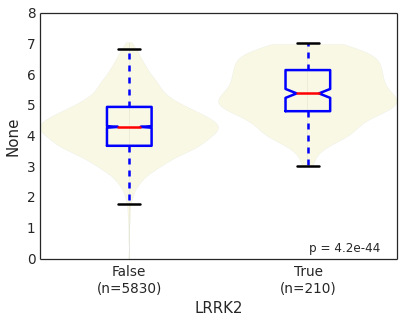

In [496]:
violin_plot_pandas(b, c)

In [491]:
fisher_exact_test(mut.ix['TP53']>0, mut.ix['LRRK2']>0)

odds_ratio    1.93e+00
p             3.53e-06
dtype: float64

In [386]:
mut.ix[ti(log_odds < -2)].sum().value_counts()

0     3947
1     1232
2      471
3      189
4       96
5       59
7       15
6       15
8       11
9        3
12       1
11       1
dtype: int64

In [617]:
fisher_exact_test(mut.ix['TP53']>0, mut.ix['SLC22A20']>0)

odds_ratio    0.28
p             0.00
dtype: float64

In [616]:
pd.crosstab(mut.ix['TP53']>0, mut.ix['SLC22A20']>0)

SLC22A20,False,True
TP53,,
False,3643,33
True,2358,6


In [405]:
glm = robjects.r.glm

In [412]:
from Stats.Regression import *

In [480]:
pd.crosstab(a,b)

col_0,0.0,1.0,2.0,3.0
TP53,,,,
False,2770,606,179,121
True,1499,533,205,127


In [467]:
len(ti(log_odds > 2.5))

88

In [611]:
gg = log_odds.order().index[-1000:]
gg = gg.intersection(ti(mut.sum(1) > 12))
len(gg)

762

In [612]:
r = {}
for g in gg:
    a = mut.ix['TP53'] > 0
    b = mut.ix[g] > 0
    c = mutation_rate 

    df = pd.DataFrame({'TP53': a, 'mut': b, 'rate': c}).astype(float)
    df_r = process_factors(df, normalize=False)

    fmla = '{} ~ {} + {}'.format('TP53', 'mut', 'rate')
    fmla = robjects.Formula(fmla)
    family = robjects.r.binomial('logit')
    fit = glm(fmla, df_r, family=family)
    d1 = robjects.r.drop1(fit, test='Chisq')
    d1 = convert_robj(d1)
    r[g] = d1

In [615]:
p_vec = pd.concat(r)['Pr(>Chi)'].unstack()['mut'].order()
p_vec.head()

SLC22A20    3.16e-05
SLC3A2      7.70e-05
SUPT16H     1.30e-04
CCDC51      5.06e-04
NOL10       2.14e-03
Name: mut, dtype: float64

In [561]:
d1

,Df,Deviance,AIC,LRT,Pr(>Chi)
<none>,NaN,7641.37,7647.37,NaN,NaN
mut,1,7641.75,7645.75,0.38,5.35e-01
rate,1,8064.28,8068.28,422.91,5.67e-94


In [494]:
print robjects.r.summary(fit)


Call:
(function (formula, family = gaussian, data, weights, subset, 
    na.action, start = NULL, etastart, mustart, offset, control = list(...), 
    model = TRUE, method = "glm.fit", x = FALSE, y = TRUE, contrasts = NULL, 
    ...) 
{
    call <- match.call()
    if (is.character(family)) 
        family <- get(family, mode = "function", envir = parent.frame())
    if (is.function(family)) 
        family <- family()
    if (is.null(family$family)) {
        print(family)
        stop("'family' not recognized")
    }
    if (missing(data)) 
        data <- environment(formula)
    mf <- match.call(expand.dots = FALSE)
    m <- match(c("formula", "data", "subset", "weights", "na.action", 
        "etastart", "mustart", "offset"), names(mf), 0L)
    mf <- mf[c(1L, m)]
    mf$drop.unused.levels <- TRUE
    mf[[1L]] <- quote(stats::model.frame)
    mf <- eval(mf, parent.frame())
    if (identical(method, "model.frame")) 
        return(mf)
    if (!is.character(method) && !is.function(m

In [404]:
glm(

In [393]:
fisher_exact_test(mut.ix['TP53']>0, mut.ix[ti(log_odds.abs() > 3)].sum()>0)

odds_ratio    1.74e+00
p             4.34e-17
dtype: float64

In [389]:
fisher_exact_test(mut.ix['TP53']>0, mut.ix[ti(log_odds < -3)].sum()>0)

odds_ratio    1.75e+00
p             2.20e-07
dtype: float64

In [370]:
fisher_exact_test(mut.ix['TP53']>0, mut.ix['CLEC3B']>0)

odds_ratio    1.56
p             0.53
dtype: float64

In [313]:
log_odds.ix[ti(p53_int)].order()

MDM2     -2.69
CCNG1    -2.37
BMX      -2.25
CDKN1A   -1.99
FAS      -1.98
KLF6     -1.84
KLF4     -1.77
EEF2     -1.70
BBC3     -1.61
KAT2B    -1.60
BAX      -1.60
CD74     -1.59
CD40LG   -1.46
CCNH     -1.42
MAPK3    -1.36
...
E2F1      1.95
PKMYT1    1.99
TFAP2A    2.07
CDC25C    2.20
CHEK1     2.22
PRKDC     2.25
RBL1      2.25
MDC1      2.32
VRK1      2.36
TAF1A     2.37
PTTG1     2.39
KPNA2     2.41
CDK1      2.67
PLK1      3.92
AURKA     4.10
Length: 297, dtype: float64

In [328]:
fisher_exact_test(p53_int, log_odds > 2)

odds_ratio    2.91
p             0.00
dtype: float64

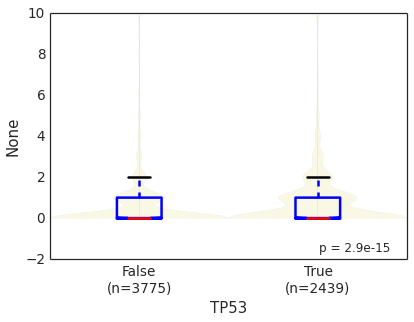

In [279]:
p = ti(log_odds > 1).intersection(ti(p53_int))
violin_plot_pandas(mut.ix['TP53']>0, (mut.ix[p] > 0).sum().clip_upper(10))

In [275]:
pd.crosstab(, ,
           rownames=['int'], colnames=['odds'])

odds,False,True
int,,
0,1304,539
1,963,544
2,561,426
3,319,266
4,156,167
5,104,126
6,60,68
7,47,61
8,26,42


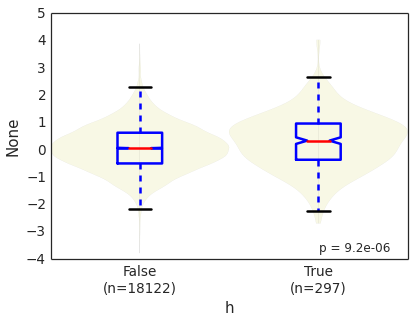

In [264]:
violin_plot_pandas(p53_int, log_odds)

In [190]:
log_odds.order()

MAGI2      -8.00
PEG3       -8.00
RGR        -3.69
TBX22      -3.58
UCN3       -3.27
PPP1R13B   -3.08
COBL       -2.98
ALAD       -2.97
LRRC48     -2.94
SELENBP1   -2.85
PER2       -2.83
SORBS2     -2.67
HRASLS5    -2.66
SLC12A7    -2.64
PROM1      -2.64
...
SLC26A6     2.30
ODZ2        2.31
MMS19       2.33
E2F7        2.34
CPSF3       2.38
STX6        2.40
C16orf74    2.43
TK1         2.45
NAGS        2.47
HSD17B1     2.81
ETV4        2.89
NDC80       3.00
AP1S1       3.56
KIAA0101    8.00
TMEM132A    8.00
Length: 18419, dtype: float64

In [202]:
dr = rna_binary_inf
dr = dr.ix[ti(dx_rna.num_dx > 200)].dropna()
cc = mut.ix['PIK3CA']>0
odds_ratio, df_odds_ratio = odds_ratio_df(dr, cc)
log_odds = np.log2(odds_ratio).clip(-8,8)

In [203]:
%time p = df_odds_ratio[log_odds.abs() > 2].apply(fet, 1).order()

CPU times: user 3.81 s, sys: 3.24 ms, total: 3.81 s
Wall time: 3.82 s


In [224]:
fisher_exact_test((mut.ix['TP53']>0).ix[ti(mut.ix['PIK3CA']>0)], 
                  dr.ix['EDA2R'])

odds_ratio    3.17e-01
p             1.06e-05
dtype: float64

In [227]:
fisher_exact_test((mut.ix['PIK3CA']>0).ix[ti(mut.ix['TP53']==0)], 
                  dr.ix['EDA2R'])

odds_ratio    1.64e-01
p             4.50e-50
dtype: float64

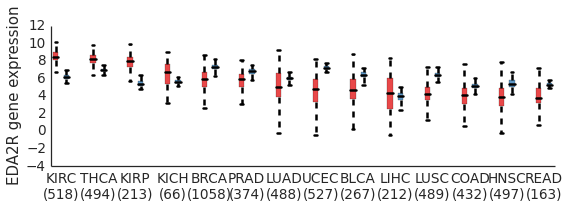

In [231]:
paired_bp_tn_split(tn_inf_c.ix['EDA2R'], codes)

In [229]:
fisher_exact_test(combine(mut.ix['PIK3CA']>0, mut.ix['TP53']>0)!='neither', dr.ix['EDA2R'])

odds_ratio     9.13e-02
p             3.46e-240
dtype: float64

In [217]:
pd.crosstab(combine(mut.ix['PIK3CA']>0, mut.ix['TP53']>0), dr.ix['EDA2R'])

EDA2R,False,True
PIK3CA,,
PIK3CA,296,77
TP53,1111,141
both,218,18
neither,874,1390


In [216]:
fisher_exact_test(dr.ix['EDA2R']>0, mut.ix['PIK3CA']>0)

odds_ratio    2.40e-01
p             8.46e-43
dtype: float64

In [215]:
fisher_exact_test(dr.ix['EDA2R']>0, mut.ix['TP53']>0)

odds_ratio     9.54e-02
p             4.01e-197
dtype: float64

In [208]:
pd.concat([p, log_odds], keys=['p','odds'], axis=1).dropna().sort('p').head(20)

,p,odds
KIF26B,3.99e-49,2.54
C15orf17,2.42e-48,-2.31
SPAG5,5.62e-45,3.33
TMEM133,5.99e-45,-2.05
ITGA7,5.62e-44,-2.22
FBXO31,7.50e-44,-2.11
SQLE,1.57e-43,2.09
EDA2R,8.46e-43,-2.06
JPH2,1.72e-41,-2.47
CLDN14,2.49e-41,2.12


In [188]:
log_odds.order()

SPATA18   -3.79
LRRK2     -3.52
ASPA      -3.42
EDA2R     -3.39
EIF4E3    -3.20
TMEM220   -3.19
CLEC3B    -3.12
RPS27L    -3.07
PDK4      -3.01
NOSTRIN   -2.98
CFD       -2.97
TMEM100   -2.92
RNF125    -2.92
CX3CR1    -2.87
KCNAB1    -2.84
...
C20orf20    3.30
WDR67       3.30
KIF23       3.34
CCNE1       3.39
TROAP       3.41
ECT2        3.46
KIAA1524    3.46
UBE2S       3.59
SPAG5       3.59
MYBL2       3.61
C1orf135    3.81
ORC6L       3.90
PLK1        3.92
KIF2C       3.97
AURKA       4.10
Length: 18419, dtype: float64

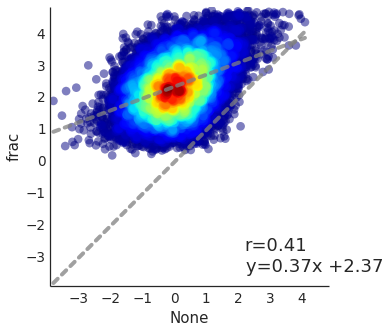

In [187]:
plot_regression(log_odds.clip(-5,5), dx_rna.frac*5, rad=.1, density=True)

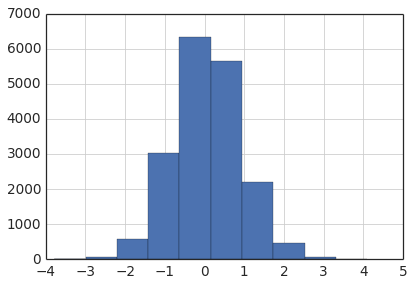

In [30]:
log_odds.hist()

In [48]:
tt = log_odds[log_odds.abs() > 2].order() > 0

In [49]:
agreement = (rna_binary_inf.ix[tt.index].T == tt).mean(1)

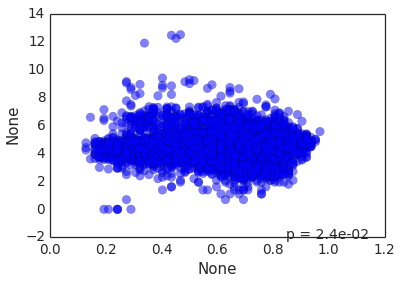

In [149]:
series_scatter(agreement, np.log(mut.sum()))

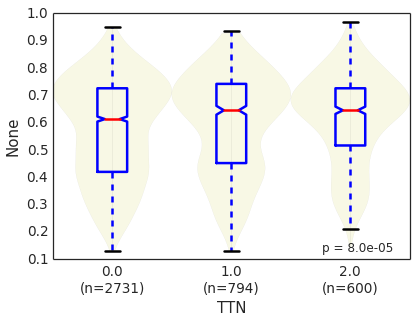

In [150]:
violin_plot_pandas(mut.ix['TTN'].clip_upper(2.), agreement)

In [63]:
rr = screen_feature(agreement, rev_kruskal, mut.ix[gg]>0, align=False)
rr.head()

,H,p,q
TP53,1479.58,0.00e+00,0.00e+00
TTN,409.31,5.19e-91,3.94e-88
CSMD3,358.92,4.85e-80,2.45e-77
VHL,353.54,7.18e-79,2.72e-76
RYR2,283.39,1.37e-63,4.16e-61


In [31]:
%time p = df_odds_ratio[log_odds.abs() > 2].apply(fet, 1).order()

CPU times: user 25 s, sys: 28.8 ms, total: 25 s
Wall time: 25 s


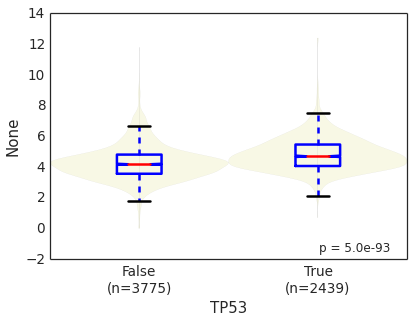

In [83]:
violin_plot_pandas(mut.ix['TP53']>0, mutation_rate)

In [133]:
l2 = log_odds[log_odds.abs() > 1]

In [135]:
direction = lambda m,v: m.groupby(v).mean().order().index[0] == True
cwmr = screen_feature(mutation_rate, rev_kruskal, rna_binary_inf.ix[l2.index], align=False)
d = pd.Series({i: direction(mutation_rate, rna_binary_inf.ix[i]) for i in l2.index})

In [141]:
p2 = df_odds_ratio.ix[ti(d == (l2 > 0))].apply(fet, 1).order()

In [143]:
l3 = l2.ix[ti(d == (l2 > 0))]

In [145]:
tt = l3 > 0
agreement = (rna_binary_inf.ix[tt.index].T == tt).mean(1)

In [164]:
rr = screen_feature(agreement, rev_kruskal, mut.ix[gg]>0, align=False)
rr.head(20)

,H,p,q
TP53,783.62,1.97e-172,2.99e-169
VHL,450.82,4.77e-100,3.62e-97
PBRM1,272.85,2.72e-61,1.38e-58
MUC4,180.29,4.18e-41,1.58e-38
PTEN,165.28,7.95e-38,2.41e-35
BRAF,132.18,1.37e-30,3.46e-28
CTNNB1,96.38,9.49e-23,2.06e-20
MUC2,87.93,6.77e-21,1.28e-18
SETD2,80.33,3.17e-19,5.35e-17
PIK3R1,69.48,7.71e-17,1.17e-14


In [153]:
fisher_exact_test(mut.ix['TP53']>0, mut.ix[ti(l3 < 0)].sum()>0)

odds_ratio    1.51e+00
p             1.79e-10
dtype: float64

In [154]:
fisher_exact_test(mut.ix['TP53']>0, mut.ix[ti(l3 > 0)].sum()>0)

odds_ratio    1.72e+00
p             2.46e-11
dtype: float64

In [36]:
lp = (-1 * np.log10(p) * np.sign(log_odds)).dropna()
lp.order()

SPATA18   -206.62
EDA2R     -196.40
RPS27L    -192.10
MDM2      -163.90
LRRK2     -141.62
NPDC1     -137.44
CX3CR1    -118.41
RNF125    -117.34
NOSTRIN   -113.41
RNPEPL1   -112.38
CYP21A2   -111.05
CFP       -107.33
FCHO2     -107.08
CCNG1     -106.39
AFF3      -104.15
...
LRP8        120.65
SPAG5       121.10
MDC1        121.55
SPERT       121.87
C1orf135    127.60
CYP27B1     132.37
KIF26B      132.67
RSRC1       133.62
LSG1        134.36
RAD21       134.78
TGS1        137.76
MCM8        140.01
NUDCD1      147.03
CTSL2       157.60
TCFL5       158.17
Length: 399, dtype: float64

In [177]:
pd.crosstab(cc, codes).T

TP53,False,True
codes,,
ACC,63,16
BLCA,121,120
BRCA,324,182
CESC,37,2
COAD,126,140
GBM,98,44
HNSC,144,350
KICH,44,22
KIRC,439,15


In [179]:
rr = screen_feature(log_odds, rev_kruskal, gs2.T)
rr.head(10)

,H,p,q
REACTOME_CELL_CYCLE_MITOTIC,117.76,1.96e-27,1.63e-24
REACTOME_MITOTIC_M_M_G1_PHASES,116.23,4.23e-27,1.76e-24
REACTOME_G1_S_TRANSITION,72.90,1.36e-17,3.77e-15
REACTOME_DNA_REPLICATION_PRE_INITIATION,65.41,6.09e-16,1.27e-13
REACTOME_SYNTHESIS_OF_DNA,59.72,1.09e-14,1.82e-12
REACTOME_MITOTIC_PROMETAPHASE,58.28,2.27e-14,3.15e-12
REACTOME_S_PHASE,57.68,3.09e-14,3.57e-12
REACTOME_CELL_CYCLE_CHECKPOINTS,57.47,3.43e-14,3.57e-12
REACTOME_M_G1_TRANSITION,53.21,3.00e-13,2.77e-11
KEGG_CELL_CYCLE,41.56,1.14e-10,9.52e-09


In [33]:
p.head()

SPATA18    2.41e-207
EDA2R      4.01e-197
RPS27L     7.92e-193
MDM2       1.27e-164
TCFL5      6.70e-159
dtype: float64

In [81]:
pd.crosstab(mut.ix['APC'], rna_binary_inf.ix['APC'], 
            colnames=['mut'],
            rownames=['exp'])

mut,False,True
exp,,
0,2982,739
1,245,16
2,102,10
3,12,0
4,8,1
6,1,1
7,2,1
8,1,0
34,1,0


In [38]:
p53 = maf[maf.Hugo_Symbol == 'TP53']

In [ ]:
p

In [53]:
variant_class = p53.set_index('barcode').Variant_Classification

In [55]:
variant_class.value_counts()

Missense_Mutation    1911
Nonsense_Mutation     354
Frame_Shift_Del       252
Splice_Site           232
SNP                    97
Frame_Shift_Ins        91
In_Frame_Del           50
Silent                 48
DEL                     9
In_Frame_Ins            7
INS                     5
Indel                   1
dtype: int64